In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, KFold

In [139]:
# Datensätze laden
df_analysis = pd.read_csv('df_camping_analysis.csv', encoding='utf-8')
df_analysis_cor = pd.read_csv('df_camping_analysis_no_cor.csv', encoding='utf-8')
df_analysis_outl = pd.read_csv('df_camping_analysis_no_outl.csv', encoding='utf-8')

## Normalisierung

In [104]:
# Funktionen zur Anzeige der Statistiken der Features -> Entscheidung für oder gegen Normalisierung
def display_feature_statistics(df, name):
    stats = df.describe().transpose()
    stats['range'] = stats['max'] - stats['min']
    stats = stats[['mean', 'std', 'min', 'max', 'range']]
    return stats

# Anzeige der Statistiken für df_analysis (enthält das Maximum an Daten
stats_df_analysis = display_feature_statistics(df_analysis, 'df_camping_analysis')
stats_df_analysis

,mean,std,min,max,range
Touristenstellplätze,85.857320,76.509364,5.0,583.0,578.0
weiter Unterküfte,0.537221,0.498922,0.0,1.0,1.0
kleiner Platz (<80 m2),0.626551,0.484020,0.0,1.0,1.0
mittlerer Platz (~100 m2),0.316377,0.465351,0.0,1.0,1.0
grosser Platz (>110 m2),0.057072,0.232124,0.0,1.0,1.0
Stellplatz am Wasser,0.094293,0.292417,0.0,1.0,1.0
Behindertengerechter Zugang,0.316377,0.465351,0.0,1.0,1.0
Haustierfreundlichkeit,0.559553,0.496749,0.0,1.0,1.0
Waschmaschine und Trockner,0.852357,0.354966,0.0,1.0,1.0
Aufenthaltsraum,0.286600,0.452454,0.0,1.0,1.0


In [149]:
# Lineare Regression - Modell mit Train-Test Split
def lineare_regression_metrics(model, df):
    X = df.drop(columns=['Preis'])
    y = df['Preis']

    # Normalisierung (Standardisierung)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-Test-Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Modell trainieren
    model.fit(X_train, y_train)

    # Vorhersagen
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metriken berechnen
    metrics = {
        'train_r2': r2_score(y_train, y_train_pred),
        'test_r2': r2_score(y_test, y_test_pred),
        'train_mse': mean_squared_error(y_train, y_train_pred),
        'test_mse': mean_squared_error(y_test, y_test_pred)
    }

    # Cross-Validation-Metriken hinzufügen
    cross_val_results = cross_val_metrics(model, X, y)
    metrics.update(cross_val_results)

    # Ausgeben von Metriken, Feature Importance Parameter
    return metrics, X_test, y_test, y_test_pred

# Random Forest - Modell mit Cross-Validation
def cross_val_metrics(model, X, y):
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    return {
        'cross_val_r2_mean': r2_scores.mean(),
        'cross_val_r2_std': r2_scores.std(),
        'cross_val_mse_mean': -mse_scores.mean(),
        'cross_val_mse_std': mse_scores.std()
    }


# Modell definieren
model = LinearRegression()

# Metriken für beide Datensätze berechnen
metrics_df_analysis, X_test_analysis, y_test_analysis, y_test_pred_analysis,  = lineare_regression_metrics(model, df_analysis)
metrics_df_analysis_cor, X_test_cor, y_test_cor, y_test_pred_cor,  = lineare_regression_metrics(model, df_analysis_cor)
metrics_df_analysis_outl, X_test_outl, y_test_outl, y_test_pred_outl,  = lineare_regression_metrics(model, df_analysis_outl)

# Zusammenführen der Ergebnisse in einem DataFrame und ausgeben
results = pd.DataFrame([metrics_df_analysis, metrics_df_analysis_cor, metrics_df_analysis_outl], index=['df_analysis', 'df_analysis_cor', 'df_analysis_outl'])

results

,train_r2,test_r2,train_mse,test_mse,cross_val_r2_mean,cross_val_r2_std,cross_val_mse_mean,cross_val_mse_std
df_analysis,0.602012,0.468678,89.881990,77.257068,0.188342,0.205532,151.241297,53.189600
df_analysis_cor,0.602011,0.468806,89.882258,77.238418,0.188342,0.205532,151.241297,53.189600
df_analysis_outl,0.639089,0.447319,43.847688,76.502005,0.334182,0.113821,80.189123,12.346765


# Ohne Normalisierung

In [150]:
# Lineare Regression - Modell mit Train-Test Split
def lineare_regression_metrics(model, df):
    X = df.drop(columns=['Preis'])
    y = df['Preis']

    # Train-Test-Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modell trainieren
    model.fit(X_train, y_train)

    # Vorhersagen
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metriken berechnen
    metrics = {
        'train_r2': r2_score(y_train, y_train_pred),
        'test_r2': r2_score(y_test, y_test_pred),
        'train_mse': mean_squared_error(y_train, y_train_pred),
        'test_mse': mean_squared_error(y_test, y_test_pred)
    }

    # Cross-Validation-Metriken hinzufügen
    cross_val_results = cross_val_metrics(model, X, y)
    metrics.update(cross_val_results)

    # Ausgeben von Metriken, Feature Importance Parameter
    return metrics, X_test, y_test, y_test_pred

# Random Forest - Modell mit Cross-Validation
def cross_val_metrics(model, X, y):
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    return {
        'cross_val_r2_mean': r2_scores.mean(),
        'cross_val_r2_std': r2_scores.std(),
        'cross_val_mse_mean': -mse_scores.mean(),
        'cross_val_mse_std': mse_scores.std()
    }


# Modell definieren
model = LinearRegression()

# Metriken für beide Datensätze berechnen
metrics_df_analysis, X_test_analysis, y_test_analysis, y_test_pred_analysis,  = lineare_regression_metrics(model, df_analysis)
metrics_df_analysis_cor, X_test_cor, y_test_cor, y_test_pred_cor,  = lineare_regression_metrics(model, df_analysis_cor)
metrics_df_analysis_outl, X_test_outl, y_test_outl, y_test_pred_outl,  = lineare_regression_metrics(model, df_analysis_outl)

# Zusammenführen der Ergebnisse in einem DataFrame und ausgeben
results = pd.DataFrame([metrics_df_analysis, metrics_df_analysis_cor, metrics_df_analysis_outl], index=['df_analysis', 'df_analysis_cor', 'df_analysis_outl'])

results

,train_r2,test_r2,train_mse,test_mse,cross_val_r2_mean,cross_val_r2_std,cross_val_mse_mean,cross_val_mse_std
df_analysis,0.602011,0.468810,89.882207,77.237845,0.188342,0.205532,151.241297,53.189600
df_analysis_cor,0.602011,0.468806,89.882258,77.238418,0.188342,0.205532,151.241297,53.189600
df_analysis_outl,0.639089,0.447319,43.847688,76.502005,0.334182,0.113821,80.189123,12.346765


Vermutung: Die Normalisierung ändert die Gewichtung der Features, aber wenn die Beziehung zwischen den Features und dem Zielwert (Preis) linear und stark ist, beeinflusst dies die Modellleistung kaum.

Um herauszufinden, welches Merkmal den grössten Einfluss auf den Preis hat, werden die Koeffizienten des linearen Modells betrachtet. Die Koeffizienten geben an, wie stark sich eine Änderung in einem Merkmal auf den Preis auswirkt, wobei alle anderen Merkmale konstant gehalten werden.

Der Intercept gibt den geschätzten Wert für die Zielvariable (hier der Preis) an, wenn alle anderen Features (unabhängigen Variablen) Null sind. Der Intercept wäre der erwartete Grundpreis des Campingplatzes, wenn all diese Merkmale auf ihren Basiswert (meistens null) gesetzt sind.

#### Interpretieren

In [151]:
# Interpretation
def linear_regression_metrics(df):
    X = df.drop(columns=['Preis'],axis = 1)
    y = df['Preis']

    # Train-Test-Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalisierung (Standardisierung) der numerischen Features
    numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
    scaler = StandardScaler()
    X[numeric_features] = scaler.fit_transform(X[numeric_features])

    # Modell trainieren
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Metriken berechnen
    metrics = {
        'achsabschnitt': model.intercept_,
        'koeffizienten': model.coef_,
        'name': X.columns
    }

    return metrics

# Berechnen der Metriken für den spezifischen Datensatz
metrics_df_analysis_outl = linear_regression_metrics(df_analysis_outl)

# Ausgabe des spezifischen Bereichs
metrics = metrics_df_analysis_outl
print(f"Achsabschnitt: {metrics['achsabschnitt']}")
print("Koeffizienten:")

feature_coefficients = zip(metrics['name'], metrics['koeffizienten'])

# Sortieren der Merkmale
sorted_features = sorted(feature_coefficients, key=lambda x: abs(x[1]), reverse=True)

for feature, coef in sorted_features:
    print(f"{feature}: {coef}")


Achsabschnitt: 26.37522626655585
Koeffizienten:
Hallenbad: 16.769786741285575
Region Tessin: 8.139430493839436
Stellplatz am Wasser: 7.929191806908776
grosser Platz (>110 m2): 7.848757439696314
mittlerer Platz  (~100 m2): 6.889602881451545
Nebensaison: -6.873007023578665
Tennis: -4.751551695784193
Unterhaltungsprogramm: -3.847088631052039
Bootsvermietung: 3.5723309239923644
Region Wallis: -3.2499386404533426
Öffnungszeit[%]: -2.765272545438317
Aufenthaltsraum: -2.7379757566889897
Wandern: 2.4398857811161183
weiter Unterküfte: 2.3095882672034342
Babypool: -2.1351169227871023
Region Berner-Mitelland: 2.117730474578668
Gastronomie: 2.0316596064519548
Waschmaschine und Trockner: 1.9456665424988824
Sternebewertung: 1.406171157063261
Mitgliedschaften: 1.1676229738875599
Region Graubuenden: 1.1285185881749675
Bahnhof: -1.1092904070214864
Sportplatz: -1.0662412481389492
Region Zuerich: 1.0122551600871394
Freibad: 0.9569155282444605
Strandzugang: 0.947964986962594
Spielplatz: 0.839825852083681


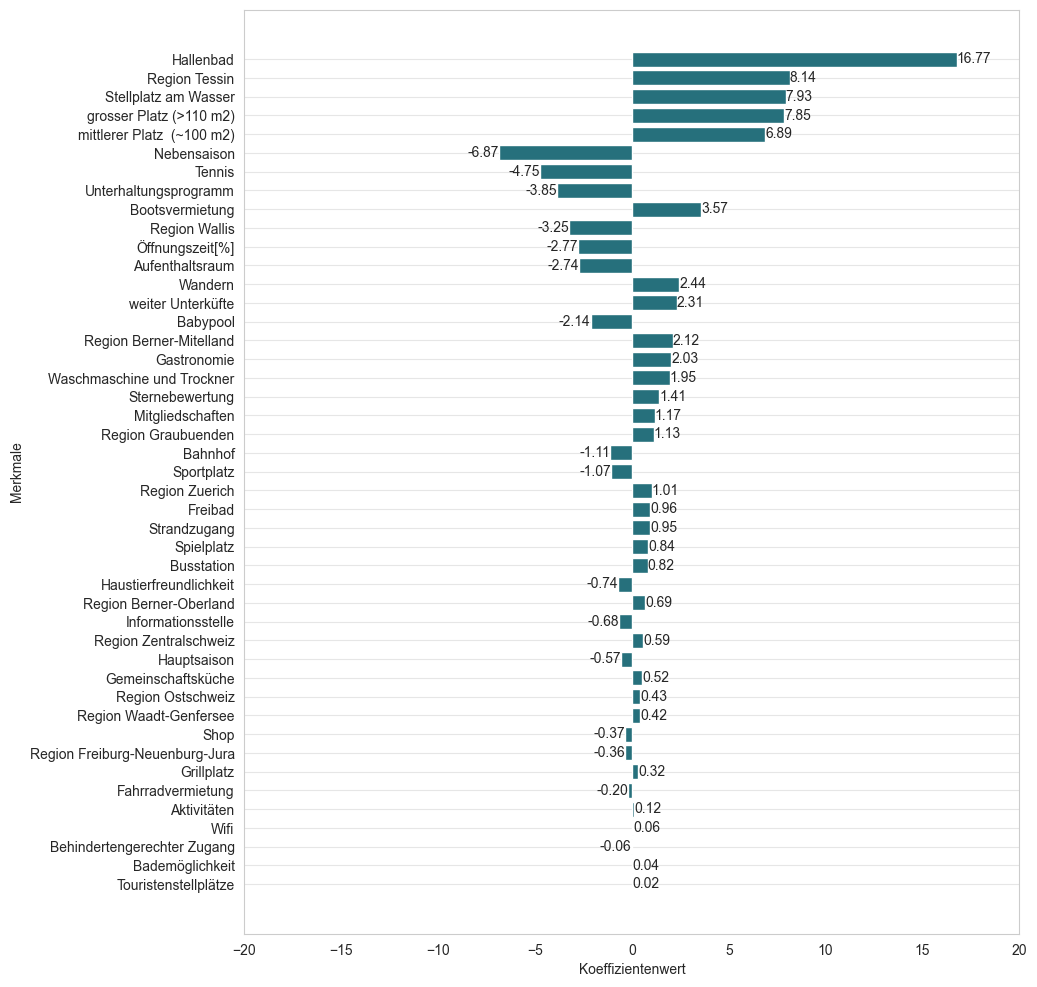

In [152]:
# visuelle Darstellung der Koeffizienten
import matplotlib.pyplot as plt

# Koeffizienten und Feature-Namen aus dem Linearen-Modell
koeffizienten = metrics['koeffizienten']
merkmale = metrics['name']

# Koeffizienten und Merkmale kombinieren
merkmale_koeffizienten = list(zip(merkmale, koeffizienten))

# Merkmale nach dem absoluten Wert der Koeffizienten sortieren
merkmale_sort = sorted(merkmale_koeffizienten, key=lambda x: abs(x[1]), reverse=True)

# Features und Koeffizienten entpacken
namen_sort, koeffizient_sort = zip(*merkmale_sort)

# Barplots erstellen
plt.figure(figsize=(10, 12))
bars = plt.barh(namen_sort, koeffizient_sort, color='#26707C')
plt.xlabel('Koeffizientenwert')
plt.ylabel('Merkmale')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='')
plt.grid(axis='y', alpha=0.5, color='#CFCFCF')


# Werte hinzufügen
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
             ha='left' if width > 0 else 'right', va='center')


plt.xlim(-20, 20)
plt.show()

